In [75]:
import urllib.request
import pandas as pd

In [143]:
# Read data
df = pd.read_csv("../data/satellite_data.csv")
df.head()

,Name,Launch date (YYYY-MM-DD),Status,Action
0,STARLINK-3321,2022-01-06,IN ORBIT,TRACK IT
1,STARLINK-3323,2022-01-06,IN ORBIT,TRACK IT
2,STARLINK-3333,2022-01-06,IN ORBIT,TRACK IT
3,STARLINK-3335,2022-01-06,IN ORBIT,TRACK IT
4,STARLINK-3353,2022-01-06,IN ORBIT,TRACK IT


In [144]:
# Handle dates properly
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])
df.columns = ['Name', 'launch_date', 'Status', 'Action']
df.index = df.launch_date

In [145]:
# Make a note that the indexing happends at the end of each week as seen below
test = df[df["Name"].str.contains("IRIDIUM")].head()
print(test)
test.groupby([pd.Grouper(key='launch_date', freq='W-MON')])["Name"].count().reset_index()

                    Name launch_date    Status    Action
launch_date                                             
2019-01-11   IRIDIUM 180  2019-01-11  IN ORBIT  TRACK IT
2019-01-11   IRIDIUM 176  2019-01-11  IN ORBIT  TRACK IT
2019-01-11   IRIDIUM 168  2019-01-11  IN ORBIT  TRACK IT
2019-01-11   IRIDIUM 173  2019-01-11  IN ORBIT  TRACK IT
2019-01-11   IRIDIUM 169  2019-01-11  IN ORBIT  TRACK IT


,launch_date,Name
0,2019-01-14,5


In [104]:
# Get weekly summation of launches
def get_weekly(df, regex, negate=False):
    if negate:
        subset = df[~(df["Name"].str.contains(regex).values)]
    else:
        subset = df[(df["Name"].str.contains(regex).values)]
    subset = subset[subset["Status"] != "DECAYED"]
    weekly = subset.groupby([pd.Grouper(key='launch_date', freq='W-MON')])["Name"].count().reset_index()
    weekly.columns = ["launch_date", "count"]
    weekly["cumsum"] = weekly["count"].cumsum()
    weekly.index = weekly.launch_date
    return weekly

In [149]:
starlink = get_weekly(df, "STARLINK")
oneweb = get_weekly(df, "ONEWEB")
neither = get_weekly(df, "STARLINK|ONEWEB", negate=True)
neither.head(5)

,launch_date,count,cumsum
launch_date,,,
2019-01-14,2019-01-14,11,11
2019-01-21,2019-01-21,13,24
2019-01-28,2019-01-28,2,26
2019-02-04,2019-02-04,0,26
2019-02-11,2019-02-11,4,30


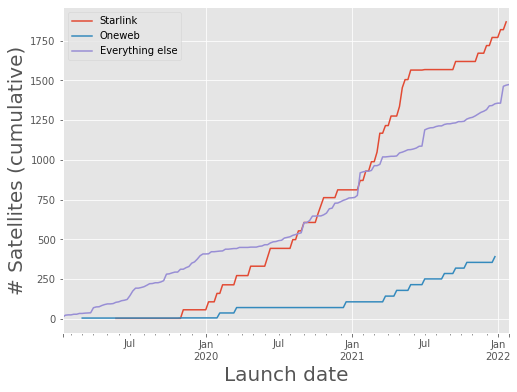

In [153]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
starlink["cumsum"].plot(figsize=(8,6), label="Starlink") 
oneweb["cumsum"].plot(label="Oneweb") 
neither["cumsum"].plot(label="Everything else") 
plt.ylabel("# Satellites (cumulative)", fontsize=20)
plt.xlabel("Launch date", fontsize=20)
plt.legend()

In [ ]:
"../data/state_centered.csv"